In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

c:\workspace\DL-Exercise\notebooks\DL3_20241006
c:\workspace\DL-Exercise\notebooks


==========iteration:0==========
SGD:2.3409164259939055
Momentum:2.4846728069663686
AdaGrad:2.199529295467761
Adam:2.2732965463028187
==========iteration:100==========
SGD:1.5250470419669724
Momentum:0.3339793875346858
AdaGrad:0.14318173591822939
Adam:0.25562917018408227
==========iteration:200==========
SGD:0.7483962371041268
Momentum:0.15970533683392388
AdaGrad:0.047181288120582324
Adam:0.12861018398938007
==========iteration:300==========
SGD:0.574181174792727
Momentum:0.24142019353430272
AdaGrad:0.11826701343117313
Adam:0.18105507048681535
==========iteration:400==========
SGD:0.3203231684324318
Momentum:0.14693635715056597
AdaGrad:0.06943576311905214
Adam:0.12357191578084767
==========iteration:500==========
SGD:0.48350417455801403
Momentum:0.2017819613020363
AdaGrad:0.14491990651787426
Adam:0.14264364175806388
==========iteration:600==========
SGD:0.3259348681508957
Momentum:0.10458942186261688
AdaGrad:0.061138946542031086
Adam:0.07222412825551781
==========iteration:700==========

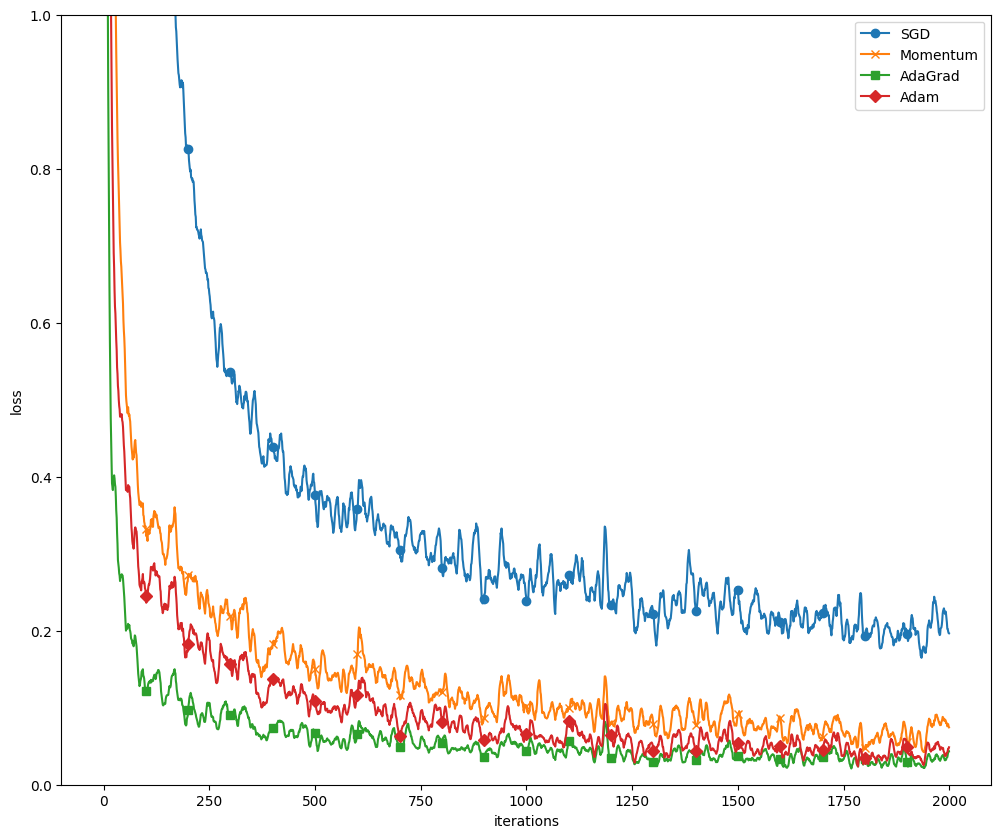

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}

for key in optimizers.keys() :
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )

    train_loss[key] = []

for i in range(max_iterations) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys() :
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0 :
        print('==========' + 'iteration:' + str(i) + '==========')
        for key in optimizers.keys() :
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {'SGD' : 'o', 'Momentum' : 'x', 'AdaGrad' : 's', 'Adam' : 'D'}
x = np.arange(max_iterations)

plt.figure(figsize=(12, 10))

for key in optimizers.keys() :
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

==========iteration:0==========
SGD:2.2318237549101125
Momentum:2.234794938308357
AdaGrad:13.599643189871081
Adam:2.0282166140906552
==========iteration:100==========
SGD:0.6303599129047563
Momentum:0.32635626074995483
AdaGrad:0.4155705275159276
Adam:0.2777009246067549
==========iteration:200==========
SGD:0.14356406251002796
Momentum:0.13433680269111933
AdaGrad:0.16519511701721773
Adam:0.11158969614877018
==========iteration:300==========
SGD:0.07884265007590158
Momentum:0.09148730855118176
AdaGrad:0.08673834666067598
Adam:0.059547968190578004
==========iteration:400==========
SGD:0.09531603562674458
Momentum:0.17064383814329992
AdaGrad:0.12420823064676306
Adam:0.11983912525603875
==========iteration:500==========
SGD:0.07355203071507449
Momentum:0.11666349094250067
AdaGrad:0.0943279230586479
Adam:0.06422205158218161
==========iteration:600==========
SGD:0.08803227196432664
Momentum:0.11624052466795892
AdaGrad:0.0935175973364461
Adam:0.09478686719808609
==========iteration:700========

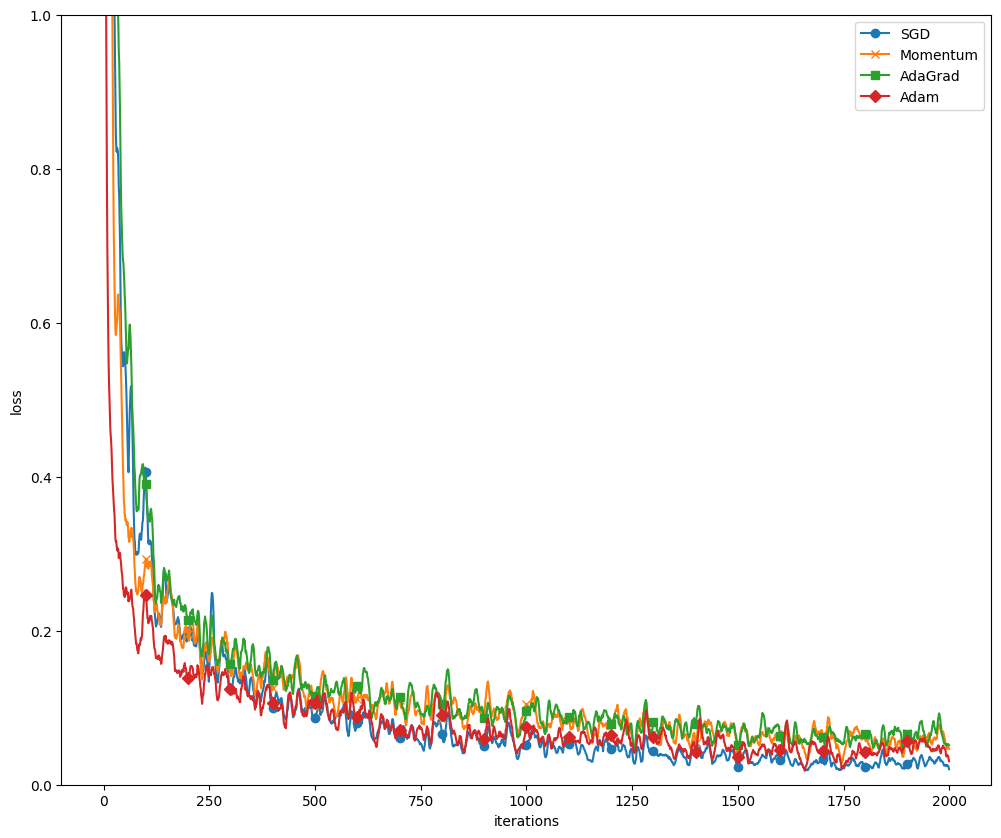

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD(lr=0.1)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=0.1)
optimizers['Adam'] = Adam(lr=0.005)

networks = {}
train_loss = {}

for key in optimizers.keys() :
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )

    train_loss[key] = []

for i in range(max_iterations) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys() :
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0 :
        print('==========' + 'iteration:' + str(i) + '==========')
        for key in optimizers.keys() :
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {'SGD' : 'o', 'Momentum' : 'x', 'AdaGrad' : 's', 'Adam' : 'D'}
x = np.arange(max_iterations)

plt.figure(figsize=(12, 10))

for key in optimizers.keys() :
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 1)
plt.legend()
plt.show()